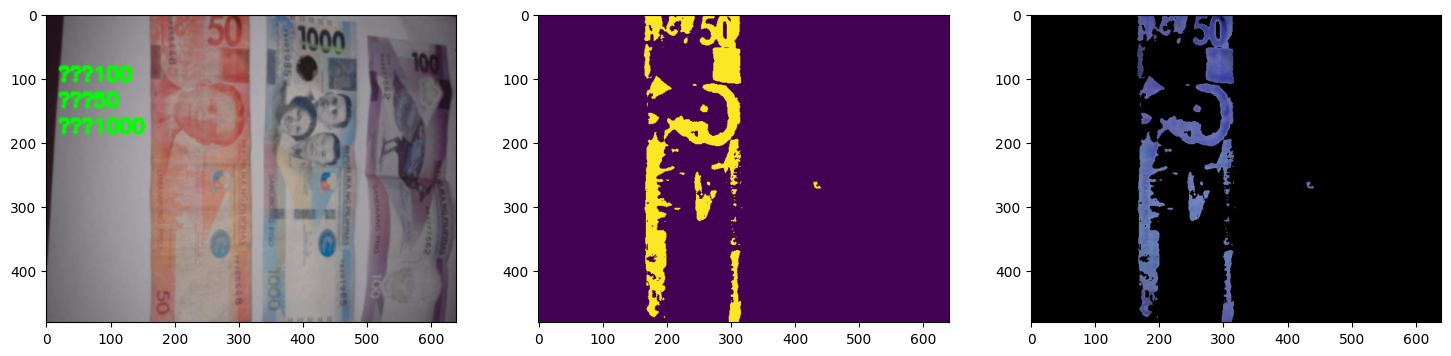

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('bills.png')
image = cv2.resize(image, (640, 480))  # Resize if needed

# Convert to HSV
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the red color range in HSV
# Red can span across the 0 and 180 boundaries, so we need two ranges
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combine both masks
red_mask = cv2.bitwise_or(mask1, mask2)

# Apply the mask to the original image
red_result = cv2.bitwise_and(image, image, mask=red_mask)

fig, axs = plt.subplots(1, 3, figsize=(18, 12))
# Display the results
axs[0].imshow(image_rgb)
axs[1].imshow(red_mask)
axs[2].imshow(red_result)


In [3]:
import cv2
import numpy as np
import tkinter as tk
from PIL import Image, ImageTk

# HSV ranges for bills
bill_ranges = {
    "₱100": [(np.array([120, 50, 50]), np.array([160, 255, 255]))],      # violet
    "₱50":  [(np.array([145, 50, 50]), np.array([170, 255, 255]))],       # pink
    "₱500": [(np.array([20, 80, 80]), np.array([40, 255, 255]))],         # yellow
    "₱1000":[(np.array([85, 50, 70]), np.array([115, 255, 255]))]         # cyan/light blue
}

def build_mask(hsv, ranges):
    mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
    for lower, upper in ranges:
        mask |= cv2.inRange(hsv, lower, upper)
    return mask

# Open webcam
cap = cv2.VideoCapture(1)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

# Tkinter window
root = tk.Tk()
root.title("Bill Detector")
root.geometry("340x500")  # increased height for bill list

# Panel for video
panel = tk.Label(root)
panel.pack(padx=5, pady=5)

# Label for total bills
total_label = tk.Label(root, text="Total Bills: 0", font=("Arial", 14), fg="red")
total_label.pack()

# Frame for detected bills
bill_frame = tk.Frame(root)
bill_frame.pack(pady=10)

bill_label_title = tk.Label(bill_frame, text="Detected Bills:", font=("Arial", 12, "bold"))
bill_label_title.pack()

bill_list_label = tk.Label(bill_frame, text="", font=("Arial", 12), justify="left")
bill_list_label.pack()

def update_frame():
    ret, frame = cap.read()
    if not ret:
        root.after(30, update_frame)
        return

    frame_resized = cv2.resize(frame, (320, 240))
    hsv = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2HSV)

    detected_bills = []

    # Detect each bill type
    for name, ranges in bill_ranges.items():
        mask = build_mask(hsv, ranges)
        count = cv2.countNonZero(mask)
        if count > 2000:  # threshold for detection
            detected_bills.append(name)
            cv2.putText(frame_resized, name, (10, 30 + 20*len(detected_bills)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    # Update total bills
    total_label.config(text=f"Total Bills: {len(detected_bills)}")

    # Show detected bills below
    if detected_bills:
        bill_text = "\n".join([f"{i+1}. {bill}" for i, bill in enumerate(detected_bills)])
    else:
        bill_text = "None"
    bill_list_label.config(text=bill_text)

    # Convert for Tkinter
    img_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img_rgb)
    imgtk = ImageTk.PhotoImage(image=im_pil)
    panel.imgtk = imgtk
    panel.configure(image=imgtk)

    root.after(30, update_frame)

def on_closing():
    cap.release()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)
update_frame()
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Jhon Paul Ojales\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "c:\Users\Jhon Paul Ojales\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 862, in callit
    func(*args)
    ~~~~^^^^^^^
  File "C:\Users\Jhon Paul Ojales\AppData\Local\Temp\ipykernel_84576\1333662395.py", line 83, in update_frame
    panel.configure(image=imgtk)
    ~~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "c:\Users\Jhon Paul Ojales\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 1822, in configure
    return self._configure('configure', cnf, kw)
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jhon Paul Ojales\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 1812, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
    ~~~~~~~~~~~~^